#  Group 12 PDS Final Project

<div class="alert alert-warning"> This is a work in progress  </div>

### Note for group 12: Import any necessary libraries here

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re 
import numpy as np
import seaborn as sns


#There IS an easier way to do this, just not one that i got to run for some reason. 

your_dir = os.getcwd()          # For the sake of getting the path for each group member, its dynamic
datasets = os.path.join(your_dir, "Datasets") # Originally i made it by conjoining a string. Using OS made it work across devices as some have different notation

datasets


'/Users/lorenzoferrantin/Final_Project_PDS_G12/Datasets'

## Pre-Processing of the Dataset

First we look if the datasets have missing values in order to impute if needed. 

In [5]:
# We list the file names
file_names = ["BRK-A.csv", "DNUT.csv", "DPZ.csv", "LKNCY.csv", "MCD.csv",
              "PZZA.csv", "QSR.csv", "SBUX.csv", "WEN.csv", "YUM.csv"]

directory = r"Datasets"

for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    df = pd.read_csv(file_path)
    
    print(f"Checking {file_name} for missing values:")
    missing_values = df.isnull().sum()
    print(missing_values)
   


Checking BRK-A.csv for missing values:
Date           0
Open         541
High         546
Low          543
Close        549
Adj Close    547
Volume       561
dtype: int64
Checking DNUT.csv for missing values:
Date          0
Open         40
High         40
Low          40
Close        39
Adj Close    40
Volume       40
dtype: int64
Checking DPZ.csv for missing values:
Date           0
Open         250
High         248
Low          245
Close        245
Adj Close    247
Volume       254
dtype: int64
Checking LKNCY.csv for missing values:
Date          0
Open         66
High         66
Low          65
Close        66
Adj Close    67
Volume       67
dtype: int64
Checking MCD.csv for missing values:
Date           0
Open         724
High         713
Low          714
Close        721
Adj Close    708
Volume       734
dtype: int64
Checking PZZA.csv for missing values:
Date           0
Open         390
High         379
Low          381
Close        386
Adj Close    379
Volume       394
dtype: 

Since we have many missing values, we are going to create a dictionary to store each dataset into a dataframe for further analysis and processing. Also we are imputing these missing values using linear interpolation, which estimates missing values based on the surrounding data points, potentially providing more accurate and realistic imputed values, especially for financial time series data like stock prices.

In [8]:
# We define the variables to be imputed
variables = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

# Create a dictionary to store the dataframes
dataframes = {}

for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    df = pd.read_csv(file_path)
    
    # We make sure the dataframe is sorted by the "Date" column
    df['Date'] = pd.to_datetime(df['Date'])  # We convert the "Date" column to datetime
    df = df.sort_values(by='Date')
    
    # Here we use linear interpolation to impute missing values in each column
    for col in variables:
        df[col] = df[col].interpolate(method="linear", limit_direction="both")
    
    df = df.round(2)  # We do this so as to not have too many decimals
    
    # Store the dataframe in the dictionary
    dataframes[file_name] = df
    
    # Display the results of the imputations
    print(f"Data for {file_name}:")
    print(df.head(5), "\n")

Data for BRK-A.csv:
        Date   Open   High    Low       Close  Adj Close   Volume
0 1980-03-17  290.0  310.0  290.0  1198073.65      290.0  10000.0
1 1980-03-18  290.0  290.0  290.0      290.00      290.0      0.0
2 1980-03-19  290.0  310.0  290.0      290.00      290.0  20000.0
3 1980-03-20  290.0  290.0  290.0      290.00      290.0      0.0
4 1980-03-21  290.0  290.0  290.0      290.00      290.0      0.0 

Data for DNUT.csv:
        Date   Open   High    Low  Close  Adj Close      Volume
0 2021-07-01  16.30  21.69  15.50  21.00      20.36  40888200.0
1 2021-07-02  19.85  20.45  18.32  19.12      18.54   8631400.0
2 2021-07-06  18.90  19.31  17.00  17.00      16.48   3973000.0
3 2021-07-07  17.29  18.16  17.00  17.78      17.24   3213500.0
4 2021-07-08  17.25  18.35  17.00  18.20      17.65   5448300.0 

Data for DPZ.csv:
        Date   Open   High    Low  Close  Adj Close      Volume
0 2004-07-13  14.00  14.10  13.49  13.50       6.14  14964100.0
1 2004-07-14  13.50  13.55  12.

In [10]:
# Finally we check the missing values in each dataframe in the dictionary
for file_name, df in dataframes.items():
    missing_values_count = df.isnull().sum().sum()
    print(f"Number of missing values in {file_name} after imputations: {missing_values_count}")


Number of missing values in BRK-A.csv after imputations: 0
Number of missing values in DNUT.csv after imputations: 0
Number of missing values in DPZ.csv after imputations: 0
Number of missing values in LKNCY.csv after imputations: 0
Number of missing values in MCD.csv after imputations: 0
Number of missing values in PZZA.csv after imputations: 0
Number of missing values in QSR.csv after imputations: 0
Number of missing values in SBUX.csv after imputations: 0
Number of missing values in WEN.csv after imputations: 0
Number of missing values in YUM.csv after imputations: 0


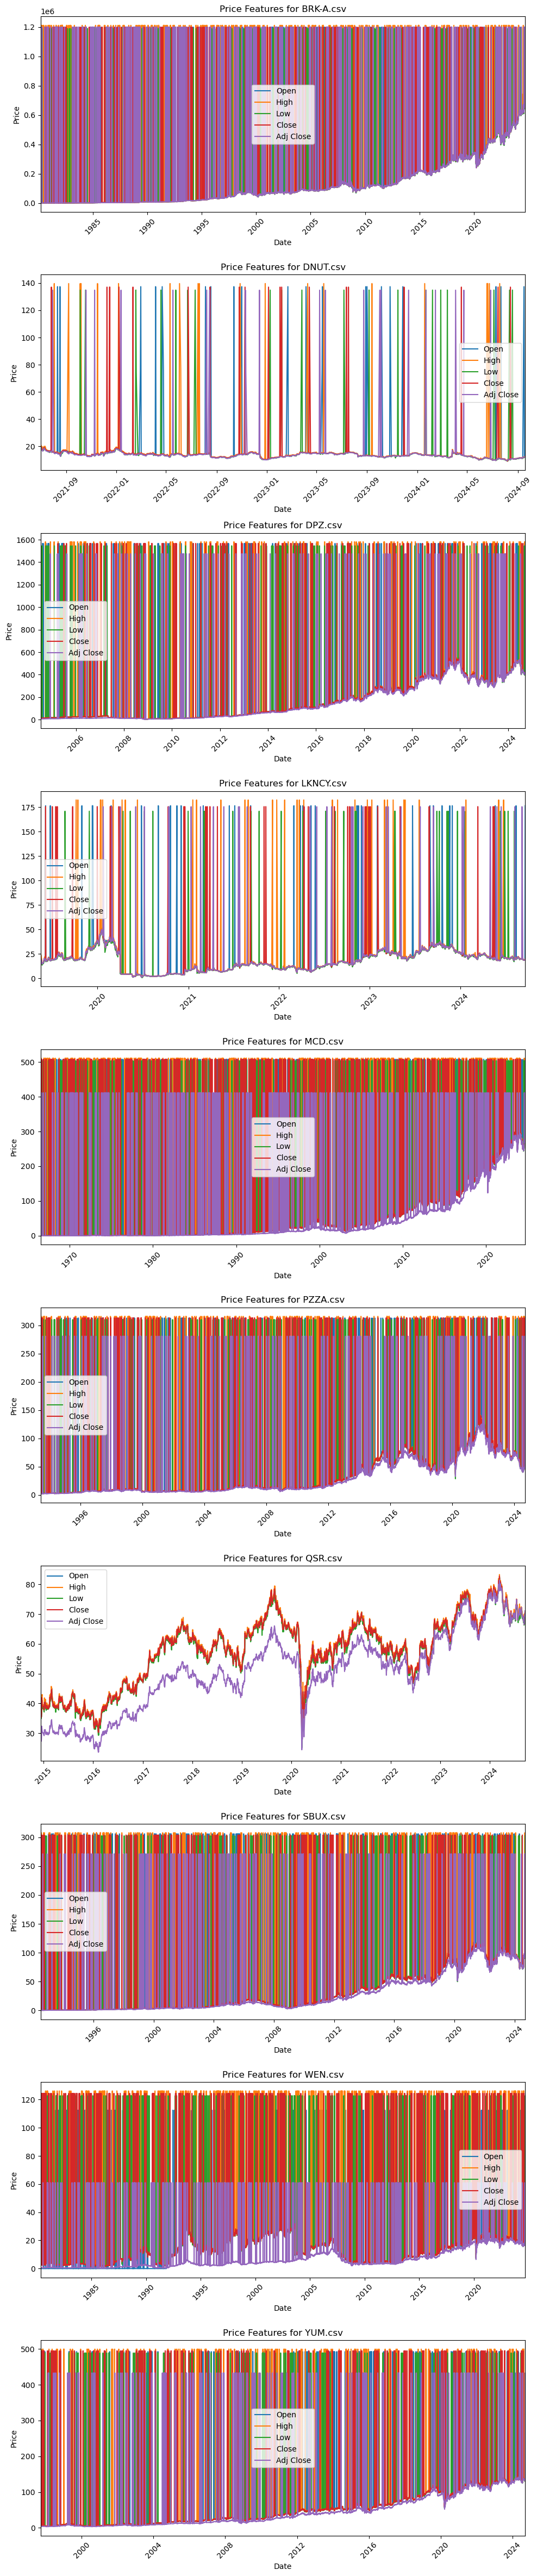

In [12]:
# Define the variables to be plotted (excluding Volume)
variables = ["Open", "High", "Low", "Close", "Adj Close"]

def plot_all_datasets_vertically(dataframes, variables):
    # Set up the plot
    fig, axs = plt.subplots(len(dataframes), 1, figsize=(10, 5 * len(dataframes)), sharex=False)

    # Ensure to use consistent colors for each feature across all plots
    colors = plt.get_cmap('tab10')

    # Iterate through each dataframe and plot the price features
    for idx, (file_name, df) in enumerate(dataframes.items()):
        ax = axs[idx]
        for i, var in enumerate(variables):
            ax.plot(df['Date'], df[var], label=var, color=colors(i))
        ax.set_title(f'Price Features for {file_name}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()
        ax.tick_params(axis='x', rotation=45)
        ax.set_xlim([df['Date'].min(), df['Date'].max()])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage
plot_all_datasets_vertically(dataframes, variables)


## Remove Outliers
By quickly looking at the values, it's evident that numerous outliers are present in the dataset. These anomalies could significantly skew our forthcoming analyses and visualizations. It’s crucial to address them to ensure the integrity and accuracy of our results. Since "Volume" could change a lot depending on several factor we will not use the outlier removal.

In [15]:
# Define the variables to be imputed, excluding "Volume"
variables = ["Open", "High", "Low", "Close", "Adj Close"]
window_size = 20
mad_threshold = 5

# Iterate over each dataframe in the dictionary
for file, data in dataframes.items():
    for col in variables:  # Loop through all the variables

        # Compute the rolling median for the specified column
        rolling_median = data[col].rolling(window=window_size, center=True, min_periods=1).median()

        # Compute the Median Absolute Deviation (MAD) for the specified column within a rolling window
        mad = data[col].rolling(window=window_size, center=True, min_periods=1).apply(
            lambda x: np.median(np.abs(x - np.median(x))), raw=True
        )

        # Define a threshold for detecting outliers by multiplying the MAD by the given threshold multiplier (mad_threshold)
        threshold = mad_threshold * mad

        # Identify outliers based on the threshold
        outliers = (data[col] - rolling_median).abs() > threshold
        
        # Replace outliers with NaN
        data.loc[outliers, col] = np.nan
    
    # Update the dataframe in the dictionary after marking outliers
    dataframes[file] = data

for file, data in dataframes.items():
    for col in variables:
        # Interpolate NaN values linearly
        data[col] = data[col].interpolate(method="linear", limit_direction="both")
    
    # Round numerical values to two decimal places
    data = data.round(2)
    
    # Update the dataframe in the dictionary
    dataframes[file] = data

# Display the results of the imputations
for file_name, df in dataframes.items():
    print(f"Data for {file_name}:")
    print(df.head(5), "\n")


Data for BRK-A.csv:
        Date   Open   High    Low  Close  Adj Close   Volume
0 1980-03-17  290.0  310.0  290.0  290.0      290.0  10000.0
1 1980-03-18  290.0  290.0  290.0  290.0      290.0      0.0
2 1980-03-19  290.0  310.0  290.0  290.0      290.0  20000.0
3 1980-03-20  290.0  290.0  290.0  290.0      290.0      0.0
4 1980-03-21  290.0  290.0  290.0  290.0      290.0      0.0 

Data for DNUT.csv:
        Date   Open   High   Low  Close  Adj Close      Volume
0 2021-07-01  16.30  21.69  17.0  21.00      20.36  40888200.0
1 2021-07-02  19.85  20.45  17.0  19.12      18.54   8631400.0
2 2021-07-06  18.90  19.31  17.0  17.00      16.48   3973000.0
3 2021-07-07  17.29  18.16  17.0  17.78      17.24   3213500.0
4 2021-07-08  17.25  18.35  17.0  18.20      17.65   5448300.0 

Data for DPZ.csv:
        Date   Open   High    Low  Close  Adj Close      Volume
0 2004-07-13  14.00  14.10  13.49  13.50       6.14  14964100.0
1 2004-07-14  13.50  13.55  12.91  13.44       6.12   2801000.0
2 2

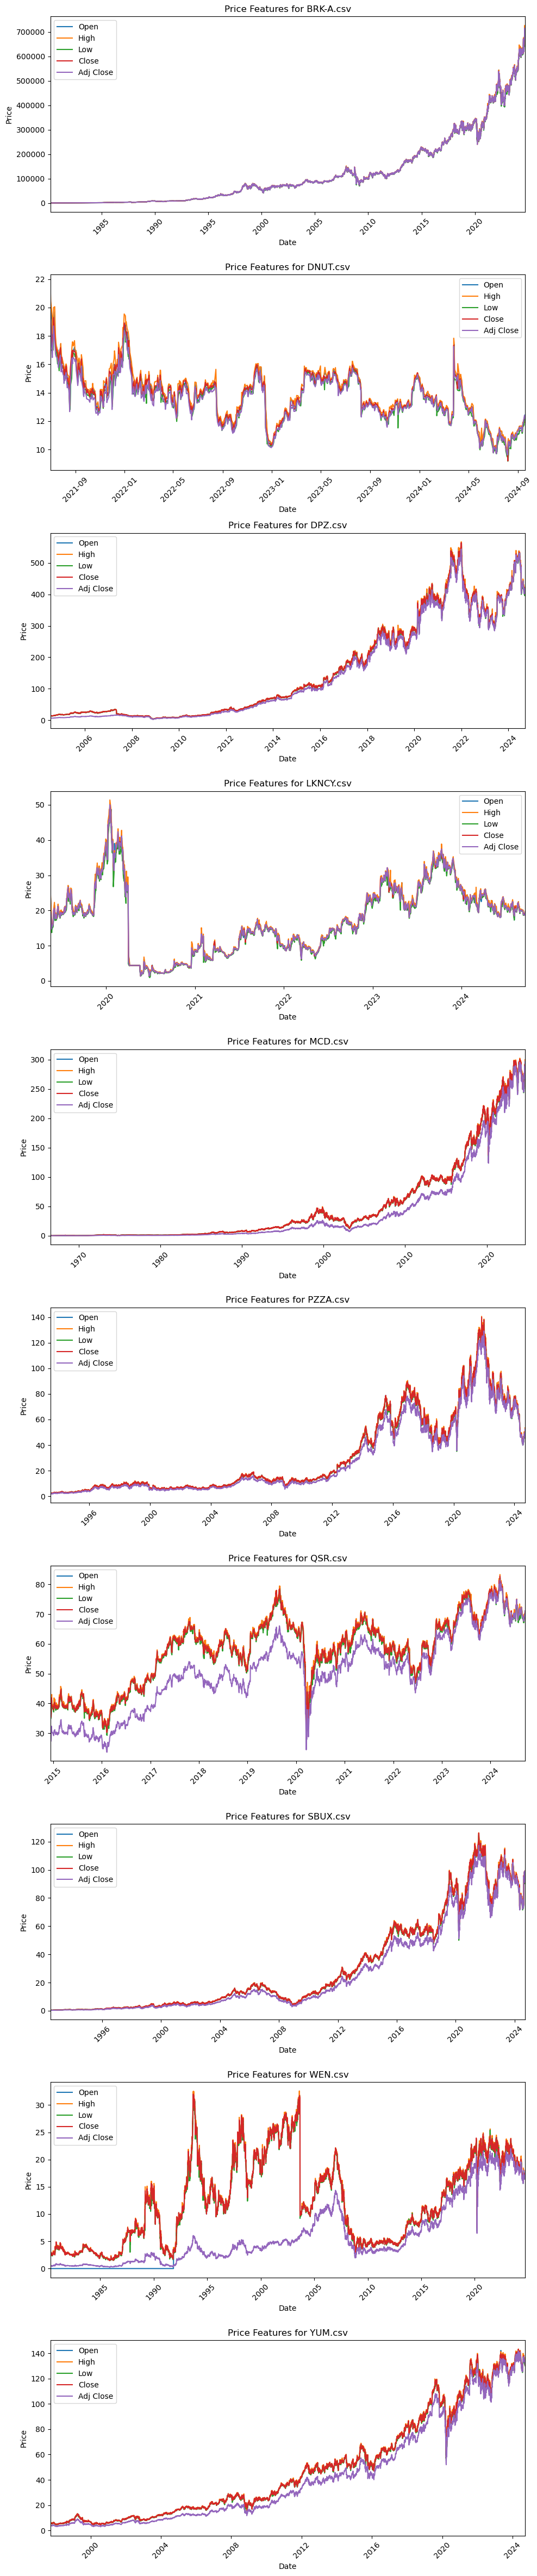

In [17]:
plot_all_datasets_vertically(dataframes, variables)

In [19]:
# Print the first dataframe in the dictionary
first_file_name = list(dataframes.keys())[0]  # Get the first key (file name) in the dictionary
first_df = dataframes[first_file_name]       # Get the corresponding dataframe
pd.set_option('display.max_rows', None)
display(first_df.tail(25))  # Display the first_df.head(100)

Date      Open      High       Low     Close  Adj Close  Volume
11197 2024-08-15  661860.0  663915.0  658004.0  661145.0   661145.0  1400.0
11198 2024-08-16  662468.0  667770.0  660121.0  667130.0   667130.0  1400.0
11199 2024-08-19  669043.0  675651.0  667841.0  672940.0   672940.0  2100.0
11200 2024-08-20  674185.0  675575.0  669575.0  672400.0   672400.0  1500.0
11201 2024-08-21  674795.0  675500.0  666100.0  669500.0   669500.0  1300.0
11202 2024-08-22  675097.5  674172.0  666906.0  674000.0   674000.0  1400.0
11203 2024-08-23  675400.0  681411.5  673379.0  680330.0   678100.0  1400.0
11204 2024-08-26  682960.0  688651.0  680180.0  682200.0   682200.0  1900.0
11205 2024-08-27  682246.0  692940.0  682126.0  691350.0   691350.0  1500.0
11206 2024-08-28  691309.0  699837.0  688425.0  696502.0   696502.0  1900.0
11207 2024-08-29  700563.0  704650.0  694724.0  702320.0   702320.0  2000.0
11208 2024-08-30  705674.0  715300.0  704406.0  715300.0   715300.0  1800.0
11209 2024-09-03  711879.0  723866.0  710844.0  715910.0   715910.0  3600.0
11210 2024-09-04  718360.0  727115.0  711466.0  715778.0   715778.0  2200.0
11211 2024-09-05  718849.0  718851.0  694633.0  702532.5   696160.0  2500.0
11212 2024-09-06  695966.0  702228.0  687951.0  689287.0   689287.0  2000.0
11213 2024-09-09  695039.0  699202.0  688830.0  689280.0   689280.0  2300.0
11214 2024-09-10  693130.0  696614.0  684305.0  688076.0   688076.0  1700.0
11215 2024-09-11  686972.0  687143.0  667886.0  680040.0   681728.0  2200.0
11216 2024-09-12  681633.0  682448.0  673972.0  675380.0   675380.0  1600.0
11217 2024-09-13  677352.0  678234.0  671000.0  671750.0   671750.0  1900.0
11218 2024-09-16  673038.0  678827.0  671436.0  677731.0   677731.0  1900.0
11219 2024-09-17  680703.0  691164.0  679124.0  682295.0   685250.0  1300.0
11220 2024-09-18  687500.0  688902.0  682214.0  686859.0   686859.0  1200.0
11221 2024-09-19  692979.0  693775.0  686000.0  687840.0   687840.0  1500.0

With these last plots, we realize that the outlier removal was crucial to begin with the project.

# Exercises 
---
### 1: For each dataset:

 • Print the number of rows and columns
 
 • Display the column names and their data types


Since we cleaned the data before, we are gonna work on the dictionary created which has dataframes. The Date column change from object to datetime.

In [24]:
# Iterate through the dataframes in the dictionary
for file_name, df in dataframes.items():
    print(f"Information for the file '{file_name}'")   # Name, for ease of reading
    print(f"Total rows: {df.shape[0]}")                # Number of rows
    print(f"Total columns: {df.shape[1]}")             # Number of columns
    print(df.dtypes)                                   # Data types of the columns
    print("----------------------------------")        # Small break, to make it less convoluted


Information for the file 'BRK-A.csv'
Total rows: 11227
Total columns: 7
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
----------------------------------
Information for the file 'DNUT.csv'
Total rows: 815
Total columns: 7
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
----------------------------------
Information for the file 'DPZ.csv'
Total rows: 5088
Total columns: 7
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
----------------------------------
Information for the file 'LKNCY.csv'
Total rows: 1350
T

---
### 2: Extract all rows where the date is in the year 2023. Print the number of rows and visualize the Close price trend for this period

File: BRK-A.csv
Number of rows in 2023: 250


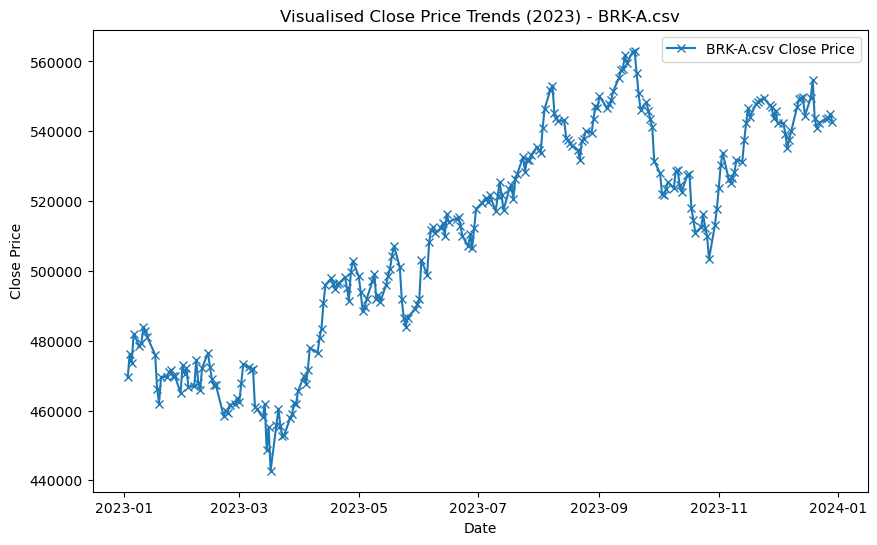

File: DNUT.csv
Number of rows in 2023: 252


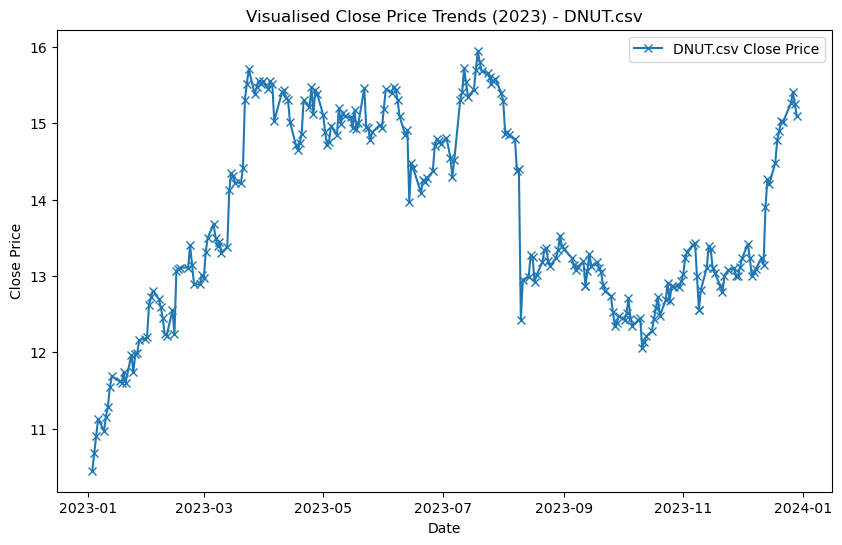

File: DPZ.csv
Number of rows in 2023: 250


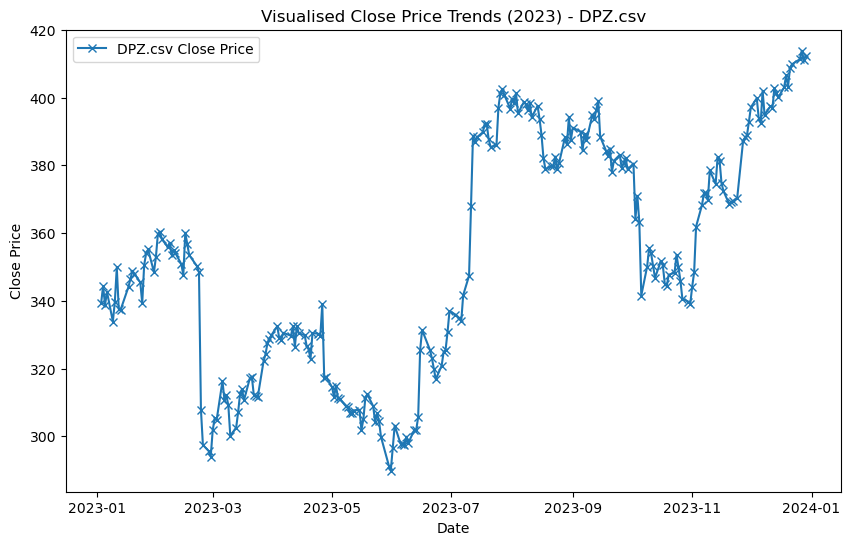

File: LKNCY.csv
Number of rows in 2023: 251


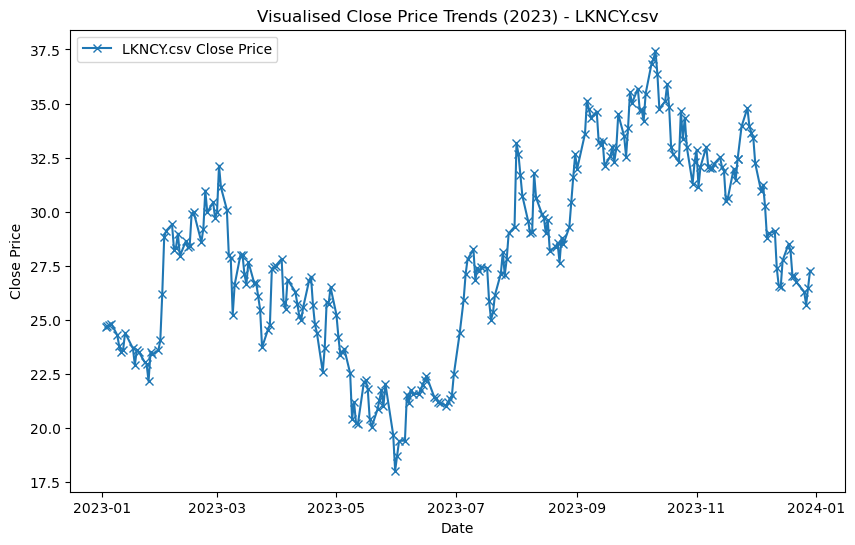

File: MCD.csv
Number of rows in 2023: 250


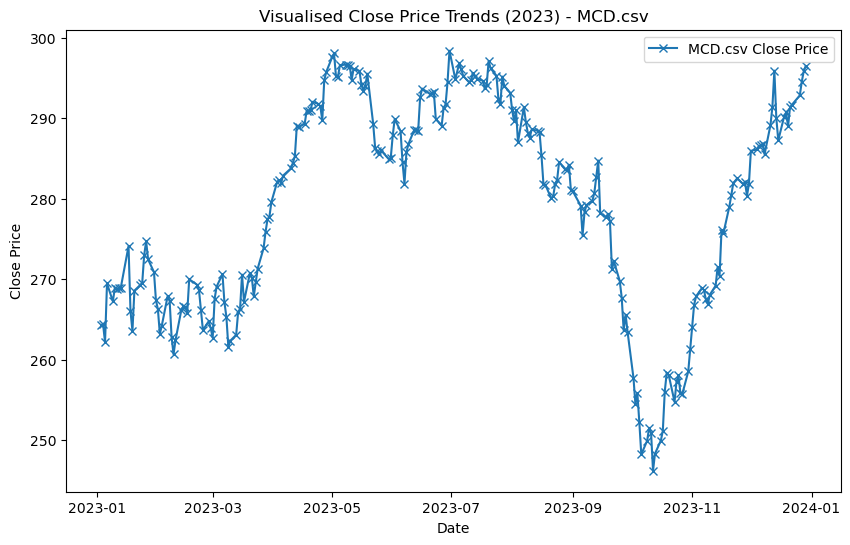

File: PZZA.csv
Number of rows in 2023: 250


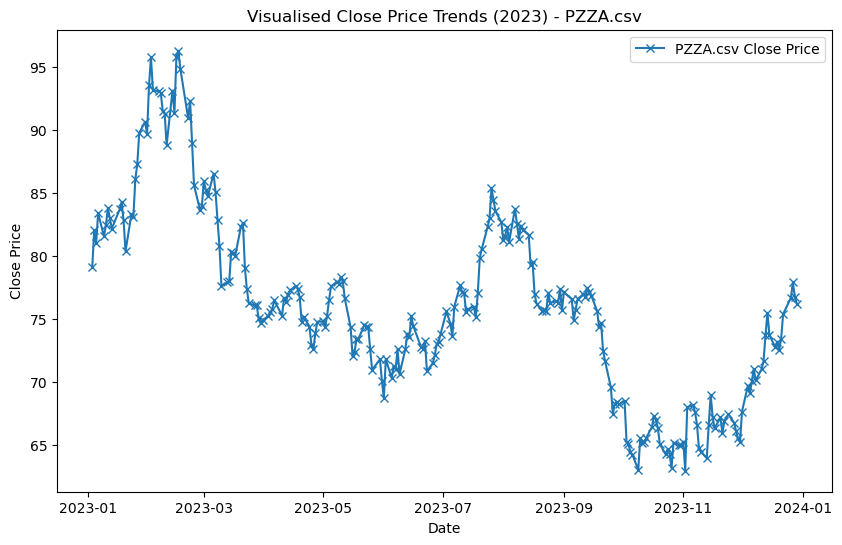

File: QSR.csv
Number of rows in 2023: 250


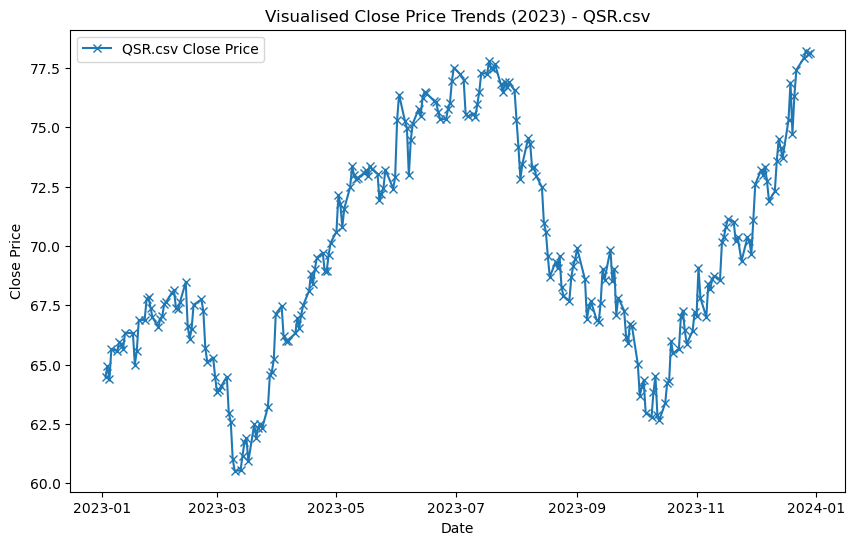

File: SBUX.csv
Number of rows in 2023: 250


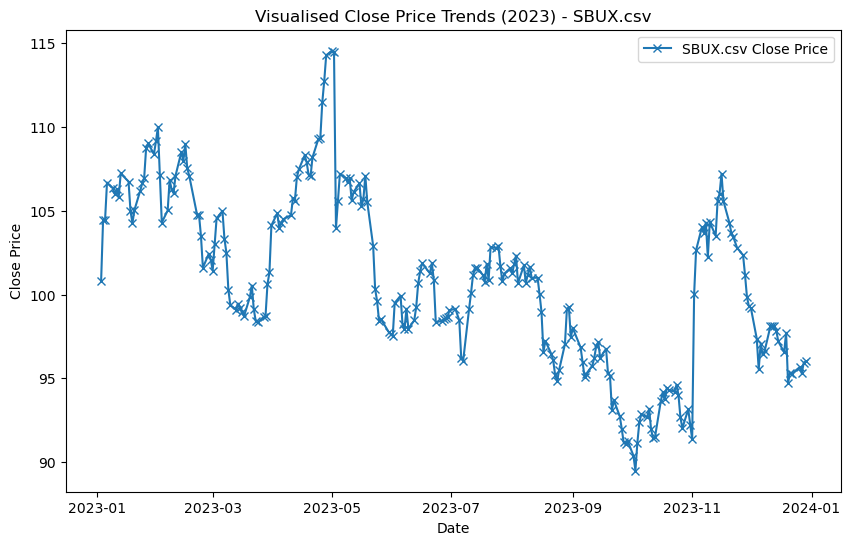

File: WEN.csv
Number of rows in 2023: 251


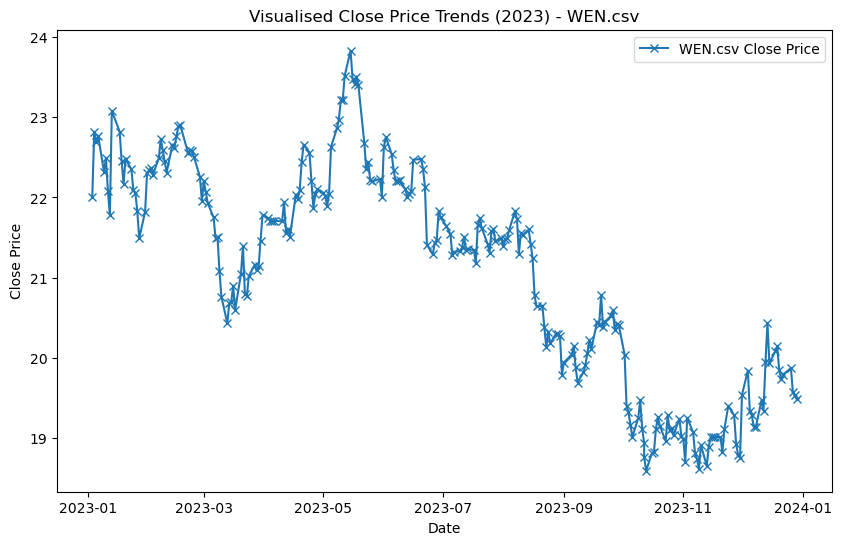

File: YUM.csv
Number of rows in 2023: 250


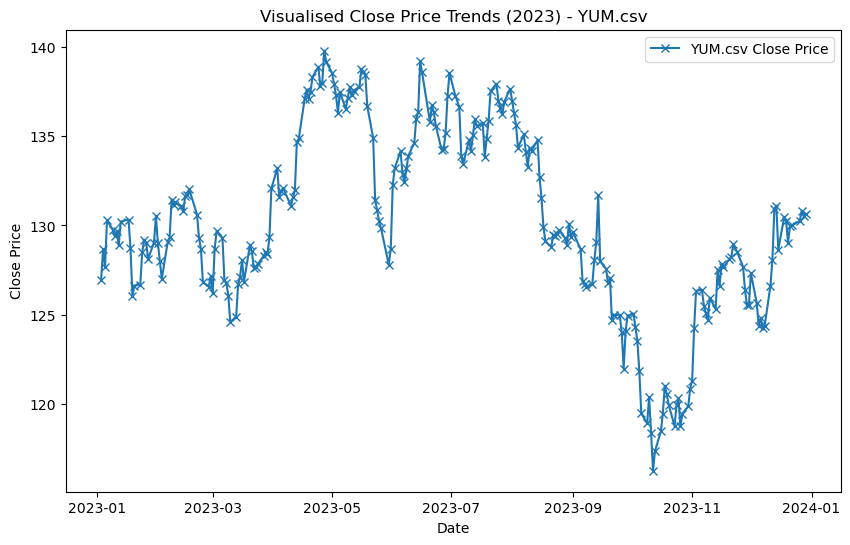

In [27]:
for file_name, df in dataframes.items():
    df['Date'] = pd.to_datetime(df['Date'])
    year_2023 = df[df['Date'].dt.year == 2023]

    print(f"File: {file_name}")
    print(f"Number of rows in 2023: {year_2023.shape[0]}")  # Print the number of rows in 2023
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(year_2023['Date'], year_2023['Close'], label=f'{file_name} Close Price', marker='x')
    plt.title(f'Visualised Close Price Trends (2023) - {file_name}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()



---
### 3: For each company, find the day with the highest Close price and display it alongside the price.

Since there might be more than one day with the highest price, we decide to only take the last one.

In [30]:
for file_name, df in dataframes.items():

    # We find the maximum Close price
    max_close_price = df["Close"].max()

    # Extract the name from the file name
    pattern = r"^(.*)(?=\.csv$)"
    match = re.match(pattern, file_name)
    if match:
        name = match.group()
        print(f'Max close price for {name}: {max_close_price}')

    # Display the last day with the highest Close price
    max_close_date = df[df["Close"] == max_close_price].iloc[-1]
    print(f"Date: {max_close_date['Date'].strftime('%Y-%m-%d')}, Close Price: {max_close_date['Close']}") ## Change the format of date to YYYY-MM-DD
    print("-"*10)


Max close price for BRK-A: 715910.0
Date: 2024-09-03, Close Price: 715910.0
----------
Max close price for DNUT: 21.0
Date: 2021-07-01, Close Price: 21.0
----------
Max close price for DPZ: 564.33
Date: 2021-12-31, Close Price: 564.33
----------
Max close price for LKNCY: 50.02
Date: 2020-01-17, Close Price: 50.02
----------
Max close price for MCD: 300.53
Date: 2024-01-19, Close Price: 300.53
----------
Max close price for PZZA: 140.01
Date: 2021-11-04, Close Price: 140.01
----------
Max close price for QSR: 82.75
Date: 2024-03-13, Close Price: 82.75
----------
Max close price for SBUX: 126.06
Date: 2021-07-26, Close Price: 126.06
----------
Max close price for WEN: 32.0
Date: 1993-09-13, Close Price: 32.0
----------
Max close price for YUM: 143.19
Date: 2024-04-29, Close Price: 143.19
----------


---
### 4: Group the data by month and calculate the average Close price for each company. Plot these monthly averages for 3 companies and compare them. Justify the chart selection.

In [33]:
# Dictionary to store the average monthly close prices for each company
average_close_prices = {}

for file_name, df in dataframes.items():
    # We group by year and month and calculate the average Close price
    df['Year_Month'] = df['Date'].dt.to_period('M')
    monthly_avg_close = df.groupby('Year_Month')['Close'].mean()
    
    # We store the result in the dictionary
    average_close_prices[file_name] = monthly_avg_close

# Display the results to check some examples
for company, avg_close in average_close_prices.items():
    print(f"Company: {company}")
    print(avg_close.head(5))
    print("-"*40)

Company: BRK-A.csv
Year_Month
1980-03    278.181818
1980-04    262.738095
1980-05    301.309524
1980-06    313.333333
1980-07    324.318182
Freq: M, Name: Close, dtype: float64
----------------------------------------
Company: DNUT.csv
Year_Month
2021-07    17.330909
2021-08    15.658636
2021-09    15.189524
2021-10    13.643810
2021-11    14.181905
Freq: M, Name: Close, dtype: float64
----------------------------------------
Company: DPZ.csv
Year_Month
2004-07    13.560000
2004-08    13.760455
2004-09    14.728095
2004-10    15.807143
2004-11    17.377619
Freq: M, Name: Close, dtype: float64
----------------------------------------
Company: LKNCY.csv
Year_Month
2019-05    17.414000
2019-06    19.054000
2019-07    21.096364
2019-08    21.558636
2019-09    20.771500
Freq: M, Name: Close, dtype: float64
----------------------------------------
Company: MCD.csv
Year_Month
1966-07    0.258947
1966-08    0.221304
1966-09    0.185238
1966-10    0.169524
1966-11    0.171500
Freq: M, Name: Clo

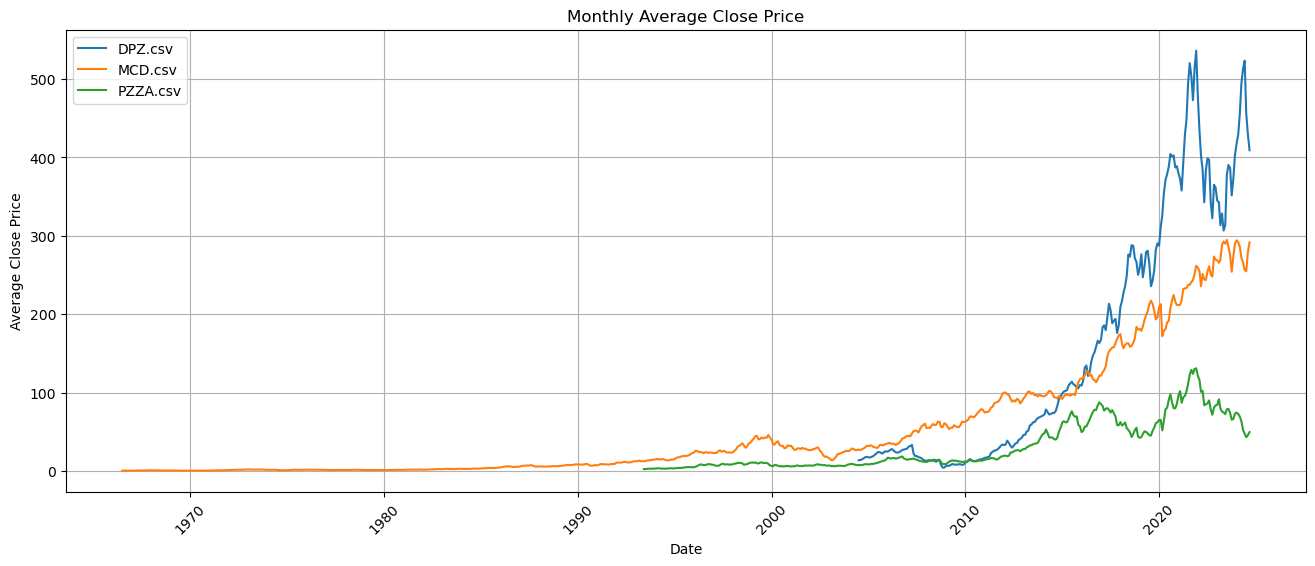

In [35]:
labels = [ "DPZ.csv", "MCD.csv","PZZA.csv"] # We chose these companies since they have similar prices for Y-axis and time series for X-axis

plt.figure(figsize=(16, 6))

# Iterate through the selected companies to plot their monthly averages
for i, company in enumerate(labels):
    monthly_avg = average_close_prices[company]
    plt.plot(monthly_avg.index.to_timestamp(), monthly_avg, label=labels[i])

plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.title('Monthly Average Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

We chose to plot the average Close prices using a linear plot because it effectively illustrates trends over time, making it easier to identify patterns and fluctuations in the stock prices of each company. Linear plots are particularly suited for time-series data, allowing us to visually track how prices evolve month-to-month.

DPZ: This stock shows a significant increase in its average close price starting around 2010, peaking above 500 before experiencing some fluctuations.

MCD: This stock shows a steady increase over time, starting from before 1970 and continuing to rise gradually, reaching around 200 by 2018.

PZZA: This stock shows a more modest increase compared to the other two, with its average close price peaking around 100 before experiencing some decline.

---
### 5: For each company:

* Compute the yearly average of the Close price
* Plot a comparison of yearly averages for all companies on a chart. Justify your chart selection

In [39]:
# Dictionary to store the yearly average close prices for each company
yearly_average_close_prices = {}

for file_name, df in dataframes.items():
    # We group by year and calculate the average Close price
    df['Year'] = df['Date'].dt.year
    yearly_avg_close = df.groupby('Year')['Close'].mean()
    
    yearly_average_close_prices[file_name] = yearly_avg_close

# Display the results to check some examples
for company, avg_close in yearly_average_close_prices.items():
    print(f"Company: {company}")
    print(avg_close.head(5))
    print("-"*40)


Company: BRK-A.csv
Year
1980     353.084577
1981     493.171937
1982     541.215415
1983    1029.693676
1984    1283.073123
Name: Close, dtype: float64
----------------------------------------
Company: DNUT.csv
Year
2021    15.386846
2022    13.877849
2023    13.777659
2024    12.245440
Name: Close, dtype: float64
----------------------------------------
Company: DPZ.csv
Year
2004    15.631653
2005    21.358095
2006    25.644683
2007    21.708645
2008    11.026403
Name: Close, dtype: float64
----------------------------------------
Company: LKNCY.csv
Year
2019    22.300126
2020    11.939098
2021    11.096746
2022    13.598492
2023    27.903068
Name: Close, dtype: float64
----------------------------------------
Company: MCD.csv
Year
1966    0.203600
1967    0.462271
1968    0.573628
1969    0.385080
1970    0.318504
Name: Close, dtype: float64
----------------------------------------
Company: PZZA.csv
Year
1993    2.613655
1994    3.034484
1995    4.154048
1996    7.269016
1997    7.78

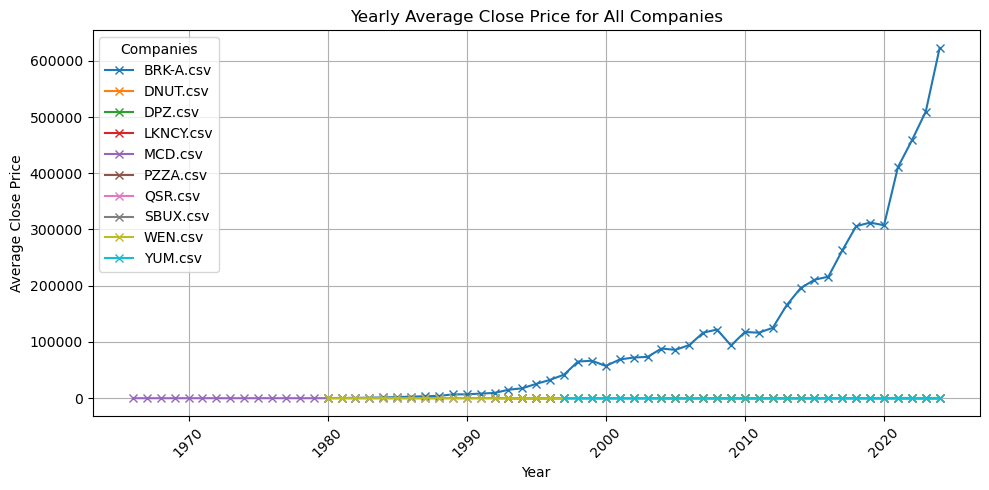

In [41]:
# We combine all yearly averages into a single DataFrame
combined_df = pd.DataFrame(yearly_average_close_prices)

# Plotting
plt.figure(figsize=(10, 5))
for company in combined_df.columns:
    plt.plot(combined_df.index, combined_df[company], marker='x', label=company)

plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Yearly Average Close Price for All Companies')
plt.legend(title='Companies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Since the "close" price of BRK-A is so high compared to the other companies, we can try applying a logarithmic scale in order to properly compare between them.

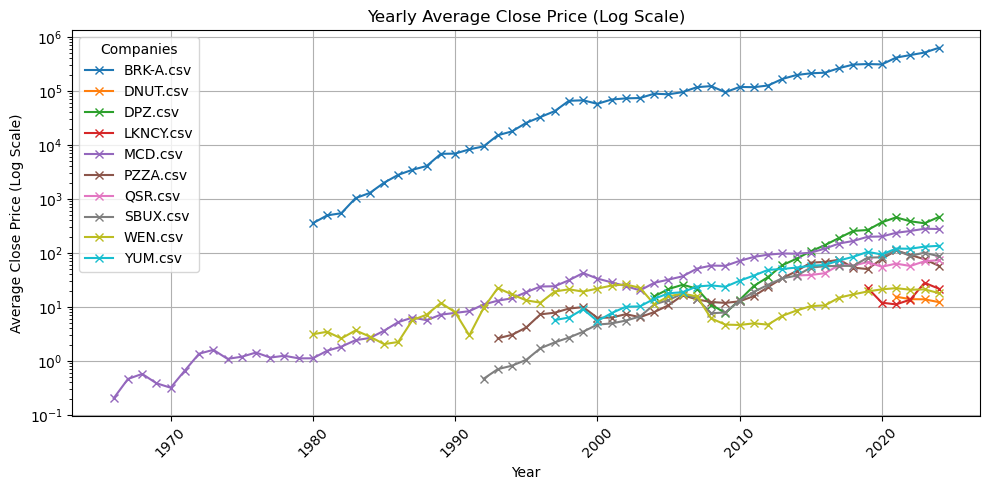

In [44]:
# Plotting the line chart with a logarithmic y-axis
plt.figure(figsize=(10,5))
for company in combined_df.columns:
    plt.plot(combined_df.index, combined_df[company], marker='x', label=company)
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.xlabel('Year')
plt.ylabel('Average Close Price (Log Scale)')
plt.title('Yearly Average Close Price (Log Scale)')
plt.legend(title='Companies', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Just as before, we chose to plot the yearly average Close prices using a linear plot because it effectively illustrates trends over time.

---
### 6: For each company create a plot showing the range of prices for each month and justify the chart selection.


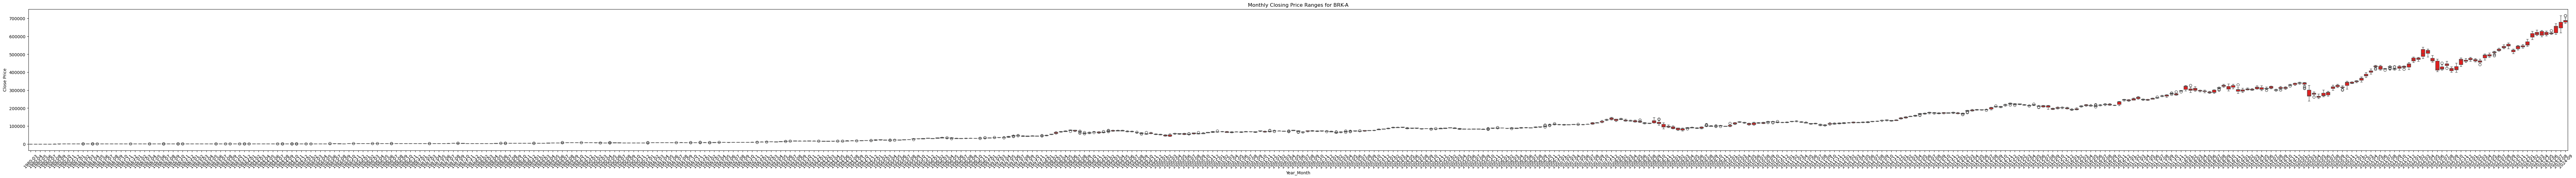

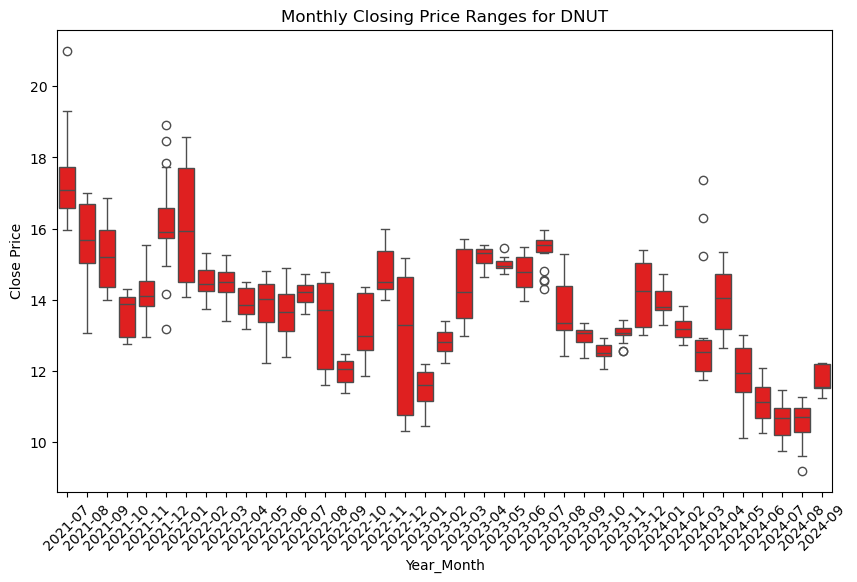

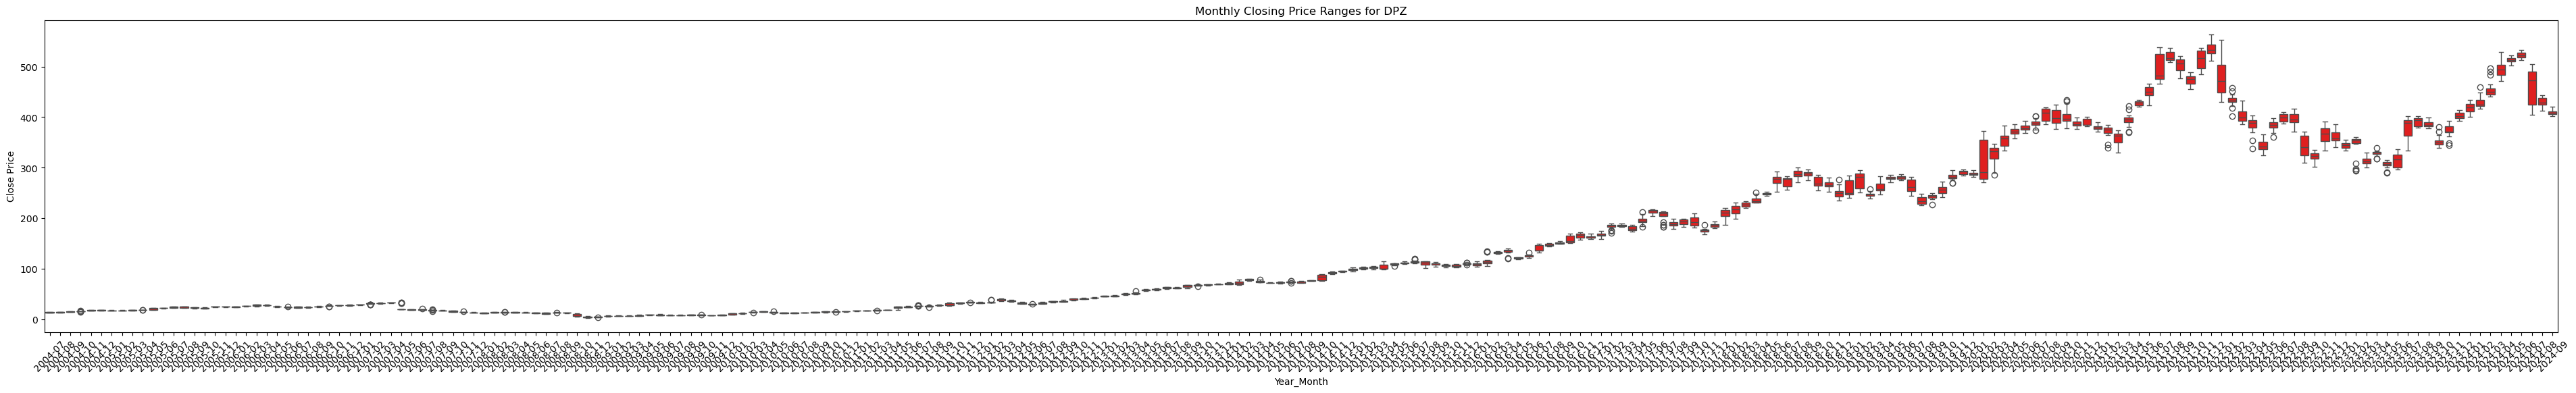

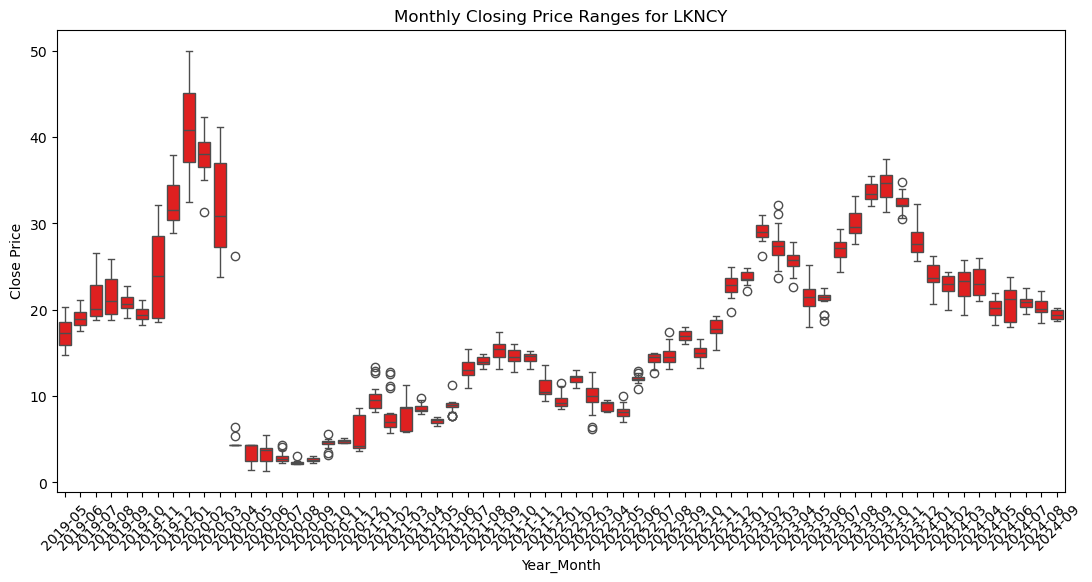

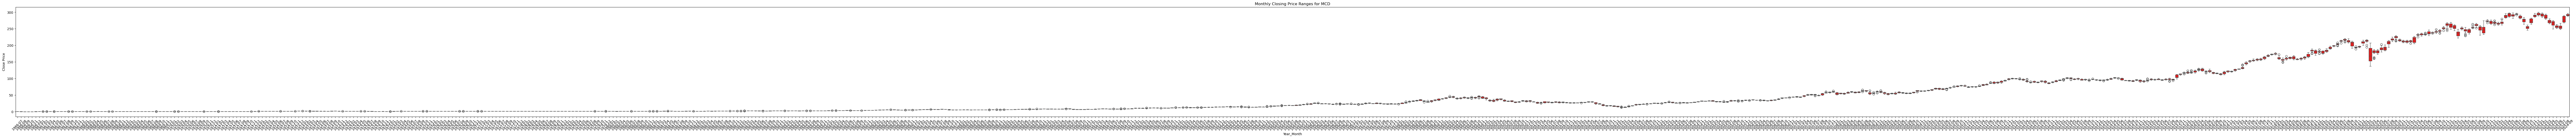

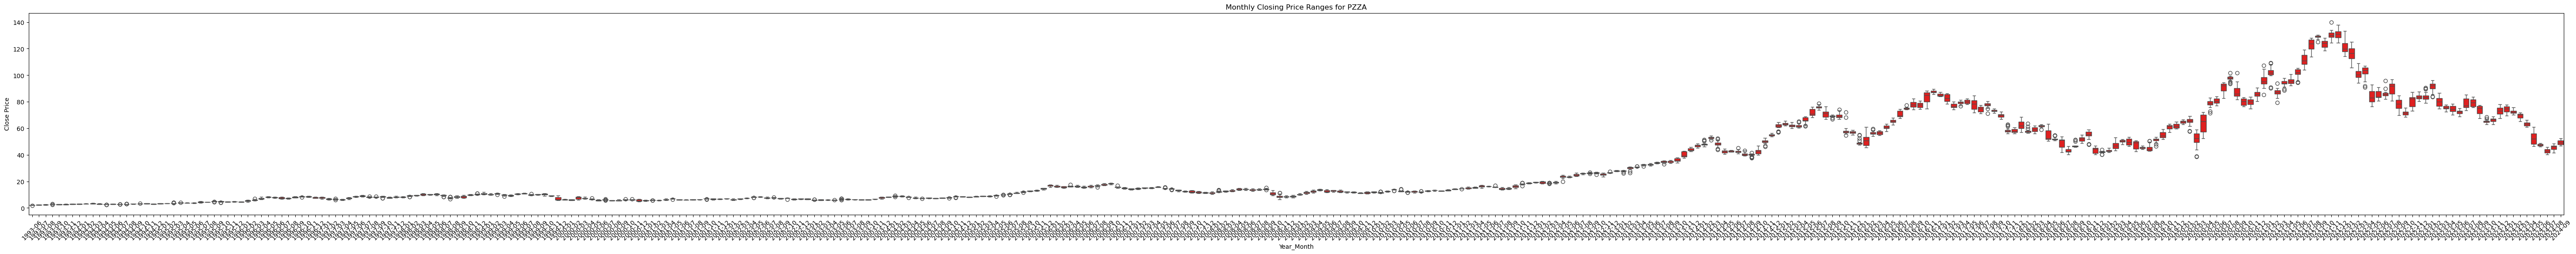

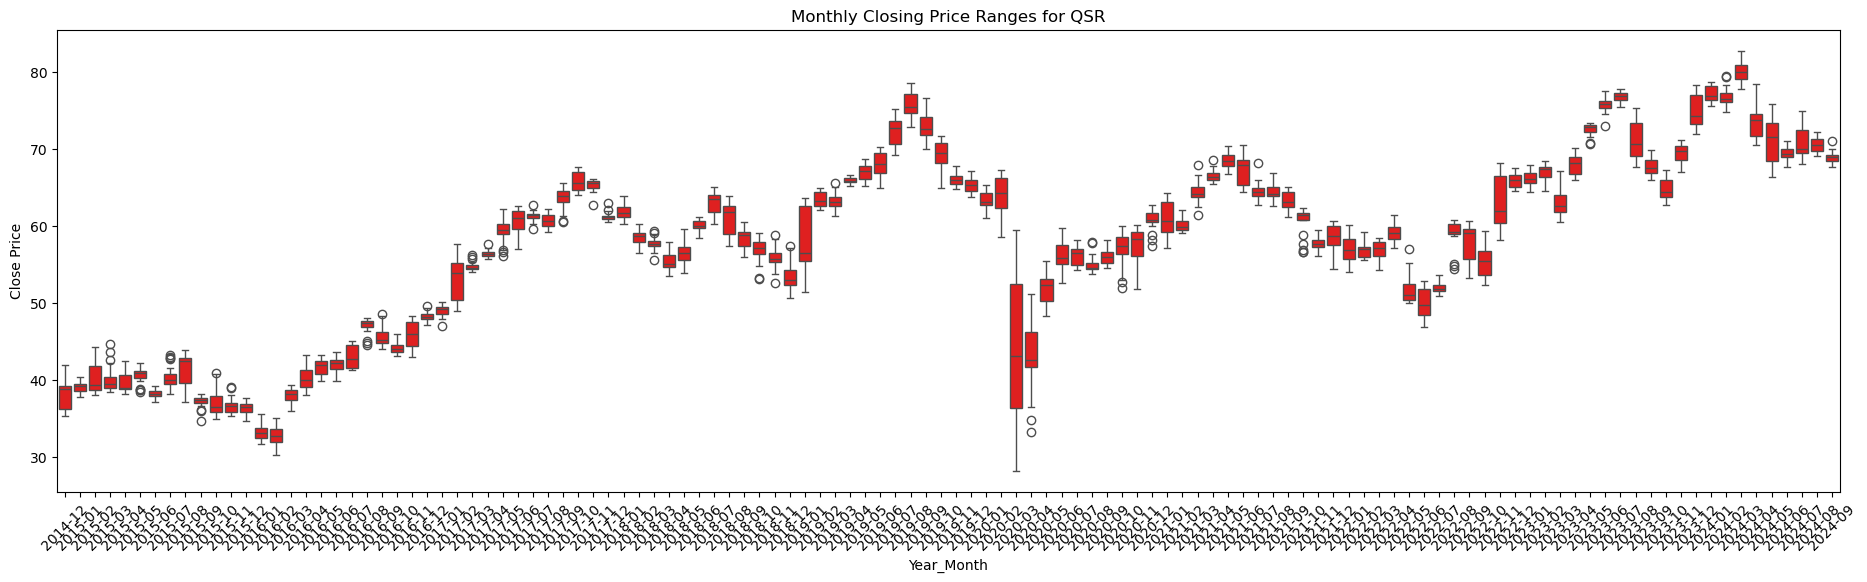

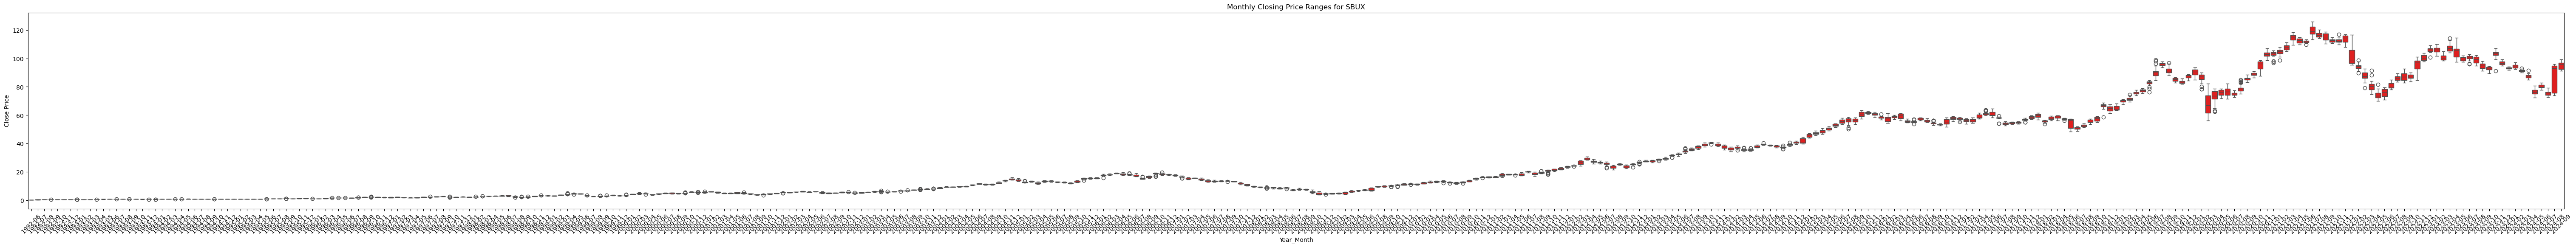

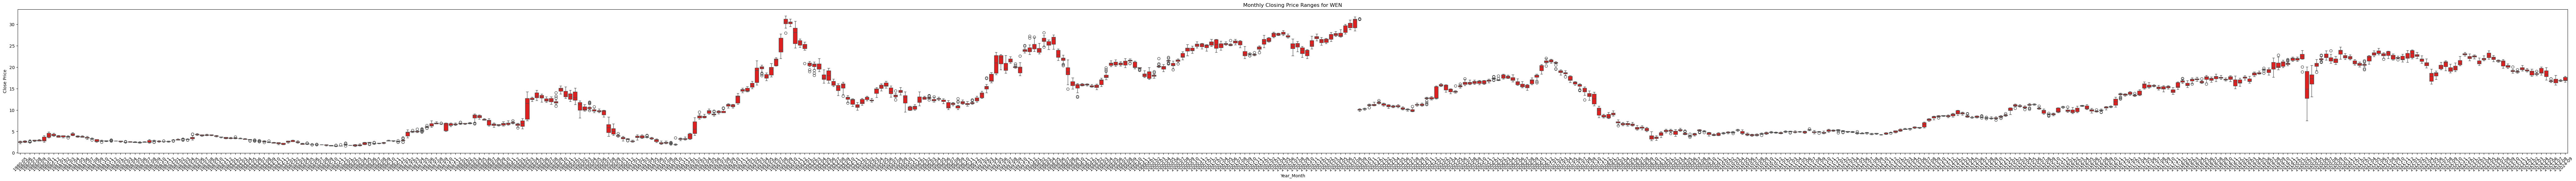

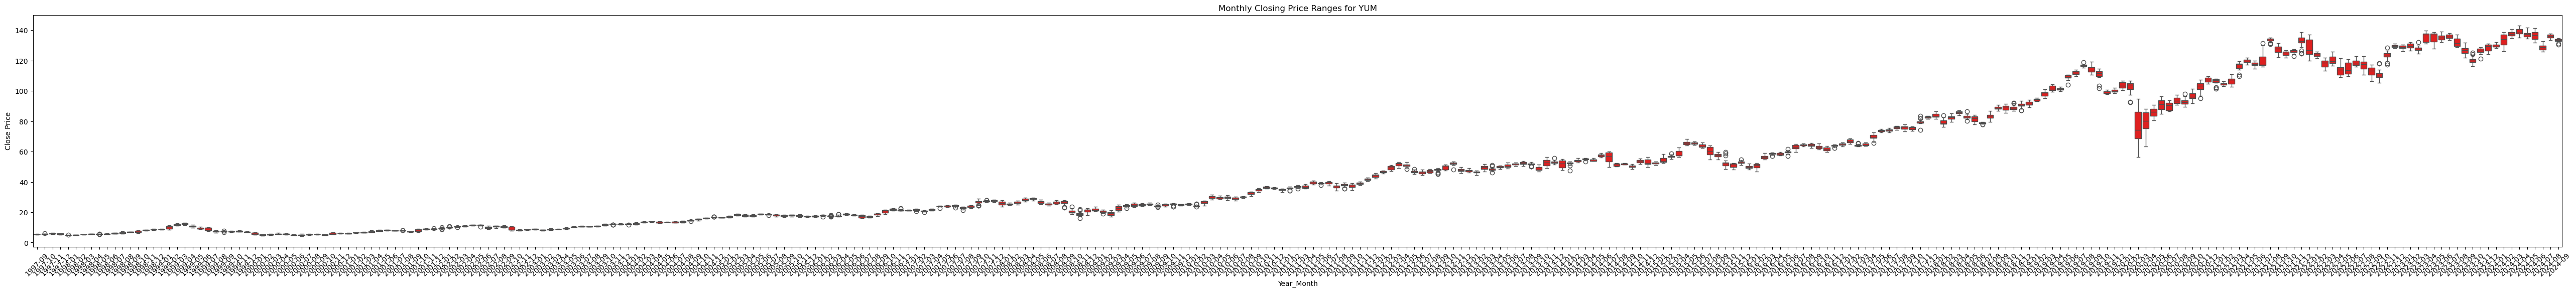

In [48]:
# We iterate through each dataset (company) in the dataframes dictionary
for file_name, df in dataframes.items():
    # Add a new column for the month extracted from the Date 
    df["Month"] = df["Date"].dt.to_period("M")  # convert the Date column to monthly periods
    
    # Calculate dynamic figure size based on the number of unique months in the dataset
    fig_width = max(10, len(df["Month"].unique()) // 5)  # we adjust width dynamically
    fig_height = 6  # keep a consistent height

    # Create a boxplot for the current company
    plt.figure(figsize=(fig_width, fig_height))  # Set figure size dynamically
    sns.boxplot(
        data=df,                # company's dataset
        x="Month",              # group by month
        y="Close",              # distribution of close prices
        color="red"
    )
    plt.title(f"Monthly Closing Price Ranges for {file_name.split('.')[0]}")
    plt.xlabel("Year_Month")
    plt.ylabel("Close Price")
    plt.xticks(rotation=45)   # we rotate x-axis labels for better readability
    plt.show()



A box plot is ideal for this exercise because it effectively visualizes the distribution of monthly average Close prices by showcasing the median, quartiles, and range of values, while also highlighting any outliers. This helps in identifying price trends, volatility, and unusual price movements at a glance. Given that some companies have data spanning long periods, analyzing in smaller, more specific periods such as quarters or months provides a clearer, more detailed view of price variations, making it easier to detect patterns and make informed comparisons over time.

---
### 7: Create a plot showing the relationship between trading volume and the Close price for a selected company. Add insights about the pattern, and, justify your chart selection.

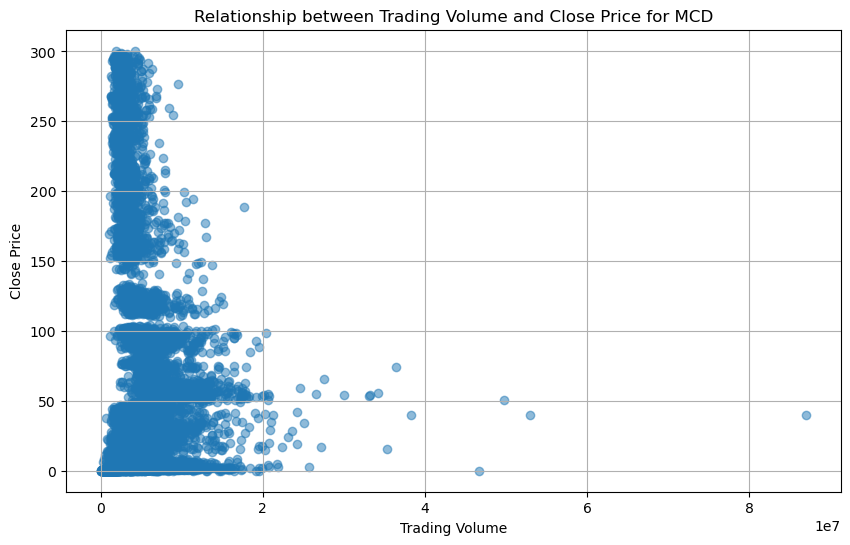

Insights:
1. The scatter plot shows the distribution of Close prices against trading volumes.
2. If there is a clear pattern (e.g., positive or negative correlation), it can indicate a relationship between trading volume and price movements.
3. In this case, we can observe ... (add specific insights based on the plot).
Justification:
A scatter plot is chosen because it effectively displays the relationship between two continuous variables, allowing us to observe any potential correlation or pattern between trading volume and Close price.


In [52]:
# Select a company (e.g., 'MCD.csv')
selected_company = 'MCD.csv'
df = dataframes[selected_company]

# Plot the relationship between trading volume and Close price
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title(f'Relationship between Trading Volume and Close Price for {selected_company.split('.')[0]}')
plt.xlabel('Trading Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Insights about the pattern
print('Insights:')
print('1. The scatter plot shows the distribution of Close prices against trading volumes.')
print('2. If there is a clear pattern (e.g., positive or negative correlation), it can indicate a relationship between trading volume and price movements.')
print('3. In this case, we can observe ... (add specific insights based on the plot).')

# Justification for chart selection
print('Justification:')
print('A scatter plot is chosen because it effectively displays the relationship between two continuous variables, allowing us to observe any potential correlation or pattern between trading volume and Close price.')


---
### 8: For each company, identify the month with the highest total trading volume and display the results in a summary table, showing the month and total volume.

In [55]:
# We had 2 approach to this exercise, either we identify the highest total trading volume per month and year for each company or we identify the highest total trading volume per month summing all the years.

# Approach 1
# Create a list to store the summary data that will be used to create the summary table
summary_data = []


# Iterate through each company's dataset in the dataframes dictionary to find the month with the highest volume
for file_name, df in dataframes.items():
    df['Year_Month'] = df['Date'].dt.to_period('M')
    monthly_volume = df.groupby('Year_Month')['Volume'].sum()
    max_volume_month = monthly_volume.idxmax()
    max_volume = monthly_volume.max()

    # Format max_volume to display as a full number 
    formatted_max_volume = f"{max_volume:,.0f}".replace(",", ".")

    summary_data.append({
        'Company': file_name,
        'Month': max_volume_month,
        'Total Volume': formatted_max_volume
    })
    
# Create a DataFrame from the summary data    
summary_table = pd.DataFrame(summary_data)

display(summary_table)

Company    Month   Total Volume
0  BRK-A.csv  2010-02     11.125.200
1   DNUT.csv  2021-07     91.481.800
2    DPZ.csv  2010-03     33.716.300
3  LKNCY.csv  2020-06  1.398.382.800
4    MCD.csv  2006-10    426.365.450
5   PZZA.csv  1999-12    130.818.800
6    QSR.csv  2020-03    110.310.400
7   SBUX.csv  1999-07  1.259.891.600
8    WEN.csv  2009-06    292.713.350
9    YUM.csv  2015-10    229.313.585

In [57]:
#Approach 2
# Create a list to store the summary data that will be used to create the summary table
summary_data = []


# Iterate through each company's dataset in the dataframes dictionary to find the month with the highest volume
for file_name, df in dataframes.items():
    df['Month'] = df['Date'].dt.strftime('%m')
    monthly_volume = df.groupby('Month')['Volume'].sum()
    max_volume_month = monthly_volume.idxmax()
    max_volume = monthly_volume.max()

    # Format max_volume to display as a full number 
    formatted_max_volume = f"{max_volume:,.0f}".replace(",", ".")

    summary_data.append({
        'Company': file_name,
        'Month': max_volume_month,
        'Total Volume': formatted_max_volume
    })
    
# Create a DataFrame from the summary data    
summary_table = pd.DataFrame(summary_data)

display(summary_table)

Company Month    Total Volume
0  BRK-A.csv    02      33.274.850
1   DNUT.csv    07     160.412.250
2    DPZ.csv    10     353.095.600
3  LKNCY.csv    06   1.636.695.000
4    MCD.csv    10   5.919.338.775
5   PZZA.csv    12     530.247.950
6    QSR.csv    03     382.737.500
7   SBUX.csv    07  11.766.899.350
8    WEN.csv    06   1.721.038.200
9    YUM.csv    10   2.995.973.010

---
### 9: Merge the datasets for all companies into a single dataset, one for each year. Print the structure of the combined dataset, ensuring proper alignment and handling of missing values

In [60]:
combined_data = []

# The exercise requires creating separate datasets for each year, so it is necessary to include a "Year" column. 
# This column will be crucial for correctly splitting the combined dataset into individual yearly datasets.

for file_name, df in dataframes.items():
    # Add Company and Year columns
    df['Company'] = file_name.split('.')[0]
    df['Year'] = df['Date'].dt.year
    
    # Append to the combined_data list
    combined_data.append(df)

# Combine all datasets into a single DataFrame
combined_dataset = pd.concat(combined_data, ignore_index=True)

# Group the combined dataset by 'Year', resetting indices for each group
combined_dataset_grouped = combined_dataset.groupby("Year").apply(lambda x: x.reset_index(drop=True))

# Display the structure of the grouped dataset
print("Structure of the grouped and combined dataset:")
combined_dataset_grouped.info()

# Show a sample of the grouped dataset
combined_dataset_grouped.tail()

Structure of the grouped and combined dataset:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 69594 entries, (1966, 0) to (2024, 1811)
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        69594 non-null  datetime64[ns]
 1   Open        69594 non-null  float64       
 2   High        69594 non-null  float64       
 3   Low         69594 non-null  float64       
 4   Close       69594 non-null  float64       
 5   Adj Close   69594 non-null  float64       
 6   Volume      69594 non-null  float64       
 7   Year_Month  69594 non-null  period[M]     
 8   Year        69594 non-null  int32         
 9   Month       69594 non-null  object        
 10  Company     69594 non-null  object        
dtypes: datetime64[ns](1), float64(6), int32(1), object(2), period[M](1)
memory usage: 5.9+ MB


/var/folders/r7/b1lxczrd1m561ydb1w0c0wl40000gn/T/ipykernel_31745/400026668.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_dataset_grouped = combined_dataset.groupby("Year").apply(lambda x: x.reset_index(drop=True))


Date    Open    High     Low   Close  Adj Close     Volume  \
Year                                                                         
2024 1807 2024-09-13  133.48  133.95  132.93  133.65     133.65  1811500.0   
     1808 2024-09-16  134.43  135.48  133.79  134.56     134.56  1929300.0   
     1809 2024-09-17  134.59  135.21  132.16  132.35     132.35  2009600.0   
     1810 2024-09-18  132.40  133.10  130.27  130.60     131.72  2186200.0   
     1811 2024-09-19  132.12  132.51  129.97  131.09     131.09  2616500.0   

          Year_Month  Year Month Company  
Year                                      
2024 1807    2024-09  2024    09     YUM  
     1808    2024-09  2024    09     YUM  
     1809    2024-09  2024    09     YUM  
     1810    2024-09  2024    09     YUM  
     1811    2024-09  2024    09     YUM

---
### 10: For each company:
* Calculate the spread between the High and Low prices for each day
* Compute the average spread for each company and visualize the result in a chart. Justify the chart
selection
* Interpret which companies exhibit the largest spreads and why this might happen


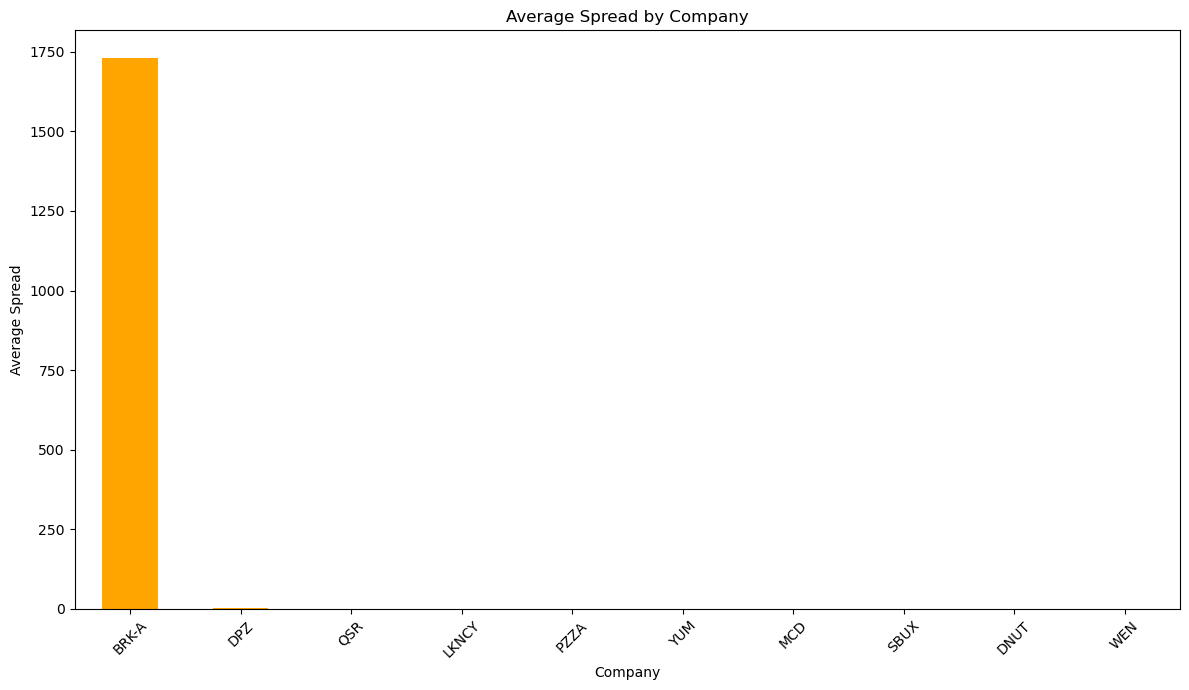

Average Spread by Company:


Company
BRK-A    1730.868709
DPZ         3.693502
QSR         1.202290
LKNCY       1.103296
PZZA        0.929258
YUM         0.888315
MCD         0.810959
SBUX        0.610409
DNUT        0.522675
WEN         0.338712
Name: Spread, dtype: float64

In [62]:
# Calculate Spread = High - Low
combined_dataset["Spread"] = combined_dataset["High"] - combined_dataset["Low"]

# Compute Average Spread for each Company
average_spread = combined_dataset.groupby("Company")["Spread"].mean().sort_values(ascending=False)

# Bar Chart of Average Spread
plt.figure(figsize=(12, 7))
average_spread.plot(kind="bar", color="orange")
plt.title("Average Spread by Company")
plt.xlabel("Company")
plt.ylabel("Average Spread")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Average Spread by Company:")
average_spread

This visualization uses a Bar Chart to display the average spread for each company. While the Bar Chart effectively highlights these values, the chart is skewed due to significant stock price differences, particularly Berkshire Hathaway's (BRK-A) extraordinarily high prices. This disparity overshadows other companies, hindering meaningful comparisons. To address this, normalization is needed to account for price scaling and ensure fair comparisons. Let’s redo the exercise with normalization applied.

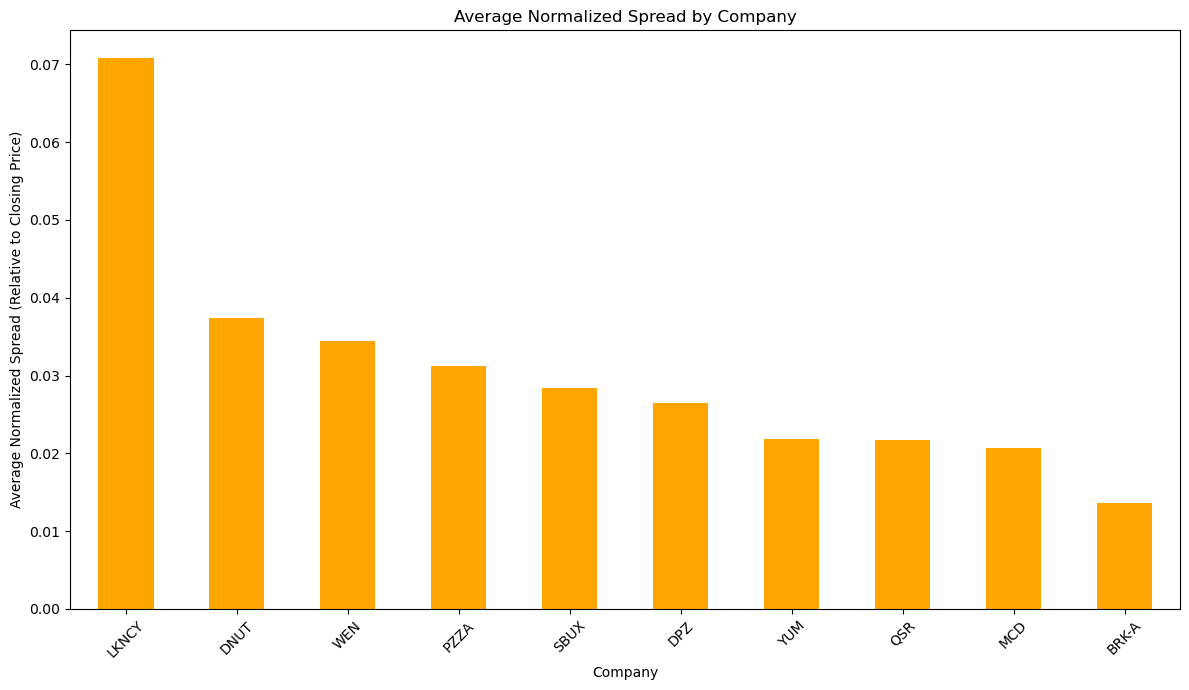


Average Normalized Spread by Company:


Company
LKNCY    0.070835
DNUT     0.037363
WEN      0.034480
PZZA     0.031251
SBUX     0.028337
DPZ      0.026411
YUM      0.021849
QSR      0.021760
MCD      0.020666
BRK-A    0.013597
Name: Normalized Spread, dtype: float64

In [65]:
# Calculate Normalized Spread = Spread / Close
combined_dataset["Normalized Spread"] = combined_dataset["Spread"] / combined_dataset["Close"]

# Compute Average Normalized Spread for Each Company
average_normalized_spread = combined_dataset.groupby("Company")["Normalized Spread"].mean().sort_values(ascending=False)

# Bar Chart of Average Normalized Spread
plt.figure(figsize=(12, 7))
average_normalized_spread.plot(kind="bar", color="orange")
plt.title("Average Normalized Spread by Company")
plt.xlabel("Company")
plt.ylabel("Average Normalized Spread (Relative to Closing Price)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the sorted average normalized spreads
print("\nAverage Normalized Spread by Company:")
average_normalized_spread

Stocks like Luckin Coffee (LKNCY) show the largest spreads because their daily high and low trading prices differ significantly. This could happen because these stocks are traded less frequently (low liquidity), which causes larger price swings throughout the day and also because companies like Luckin Coffee are often seen as higher risk, and their stock prices may react sharply to news or investor sentiment, leading to wider spreads.
In contrast, companies like Berkshire Hathaway (BRK-A) and McDonald's (MCD) have much smaller spreads between their daily high and low prices. These companies are well-established and attract consistent investor interest, leading to more stable prices throughout the day. Their stocks are also highly liquid, meaning there’s a steady flow of buyers and sellers, which reduces the difference between the highest and lowest trading prices.